<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter04_NN%E3%81%A7%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR回路を学習

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8a68745996e9427b29a73ce6d002455367ad9f7776d64b9932e7c944192ea7f3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [5]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [6]:
# 準備
input_data = [[0,0],[1,0],[0,1],[1,1]]
xor_data = [0,1,1,0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）：")
print(x_train)
print("学習データ（答え）：")
print(y_train)

学習データ（問題）：
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）：
[0 1 1 0]


In [11]:
# model を作成
model = keras.models.Sequential()
model.add(layers.Dense(8, activation='relu', input_dim=2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=500,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.1667 - loss: 0.7004 - val_accuracy: 0.5000 - val_loss: 0.7281
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1667 - loss: 0.7859 - val_accuracy: 0.2500 - val_loss: 0.7237
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1000 - loss: 0.8087 - val_accuracy: 0.2500 - val_loss: 0.7199
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2667 - loss: 0.6765 - val_accuracy: 0.2500 - val_loss: 0.7168
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1000 - loss: 0.7414 - val_accuracy: 0.2500 - val_loss: 0.7137
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2667 - loss: 0.6370 - val_accuracy: 0.2500 - val_loss: 0.7109
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1000 - loss: 0.7827 - val_accuracy: 0.2500 - val_loss: 0.7077
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4667 - loss: 0.5744 - val_accuracy: 0.2500 - val_loss

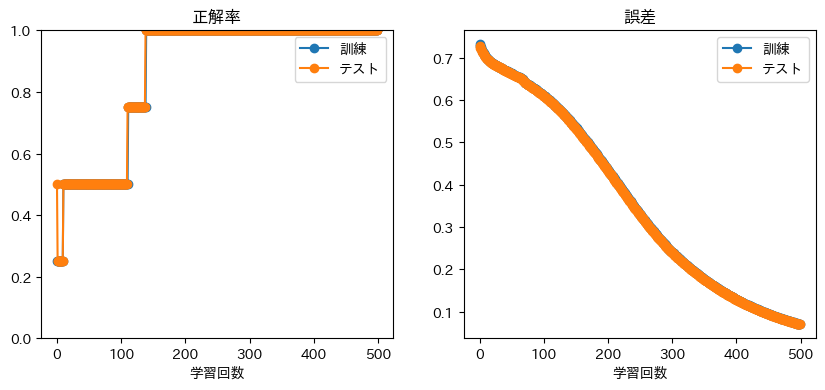

In [13]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()